In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Getting Dataset

In [2]:
X_train = pd.read_csv("C:/Users/vikas/Downloads/Training Data/Diabetes_XTrain.csv")
Y_train = pd.read_csv("C:/Users/vikas/Downloads/Training Data/Diabetes_YTrain.csv")
X_test = pd.read_csv("C:/Users/vikas/Downloads/Diabetes_Xtest.csv")

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [5]:
Y_train.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.758681,3.328783,0.000,1.00000,3.0000,6.00000,17.00
Glucose,576.0,119.975694,31.512914,0.000,99.00000,116.0000,139.00000,199.00
BloodPressure,576.0,68.826389,20.285812,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,576.0,20.364583,15.893856,0.000,0.00000,22.0000,32.00000,63.00
Insulin,576.0,76.166667,109.193550,0.000,0.00000,36.0000,120.00000,744.00
BMI,576.0,31.857292,8.134926,0.000,26.97500,32.0000,36.72500,67.10
DiabetesPedigreeFunction,576.0,0.481519,0.336910,0.078,0.24775,0.3815,0.64125,2.42
Age,576.0,32.954861,11.878137,21.000,24.00000,29.0000,40.00000,81.00


In [7]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,192.0,4.104167,3.485134,0.000,1.000,3.0000,6.2500,15.000
Glucose,192.0,123.651042,33.245684,0.000,101.500,120.0000,145.2500,198.000
BloodPressure,192.0,69.942708,16.269068,0.000,64.000,72.0000,78.5000,108.000
SkinThickness,192.0,21.052083,16.156868,0.000,0.000,25.5000,32.0000,99.000
Insulin,192.0,90.697917,131.451830,0.000,0.000,9.0000,140.5000,846.000
BMI,192.0,32.398438,7.083182,0.000,28.175,32.4000,36.1500,52.300
DiabetesPedigreeFunction,192.0,0.442948,0.313054,0.085,0.207,0.3465,0.5705,1.893
Age,192.0,34.098958,11.386388,21.000,25.000,30.0000,41.0000,69.000


In [8]:
X_train.corr()     # Gives the correaltion between all the features of X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.175781,0.159623,-0.089059,-0.059903,0.043933,-0.036454,0.555994
Glucose,0.175781,1.000000,0.151899,0.035213,0.332527,0.213883,0.151490,0.261131
BloodPressure,0.159623,0.151899,1.000000,0.235094,0.102192,0.272952,0.031765,0.254055
SkinThickness,-0.089059,0.035213,0.235094,1.000000,0.456451,0.403305,0.179001,-0.115892
Insulin,-0.059903,0.332527,0.102192,0.456451,1.000000,0.183658,0.222323,-0.049814
BMI,0.043933,0.213883,0.272952,0.403305,0.183658,1.000000,0.143271,0.051957
DiabetesPedigreeFunction,-0.036454,0.151490,0.031765,0.179001,0.222323,0.143271,1.000000,0.034847
Age,0.555994,0.261131,0.254055,-0.115892,-0.049814,0.051957,0.034847,1.000000


In [9]:
X_test.corr()      # Gives the correaltion between all the features of X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,-0.003977,0.075177,-0.064346,-0.115482,-0.074373,-0.015735,0.507558
Glucose,-0.003977,1.000000,0.154908,0.116200,0.324468,0.242987,0.106389,0.265379
BloodPressure,0.075177,0.154908,1.000000,0.107868,0.048135,0.317924,0.086705,0.181903
SkinThickness,-0.064346,0.116200,0.107868,1.000000,0.391828,0.358329,0.205263,-0.111901
Insulin,-0.115482,0.324468,0.048135,0.391828,1.000000,0.241507,0.101525,-0.031734
BMI,-0.074373,0.242987,0.317924,0.358329,0.241507,1.000000,0.139355,-0.025874
DiabetesPedigreeFunction,-0.015735,0.106389,0.086705,0.205263,0.101525,0.139355,1.000000,0.038882
Age,0.507558,0.265379,0.181903,-0.111901,-0.031734,-0.025874,0.038882,1.000000


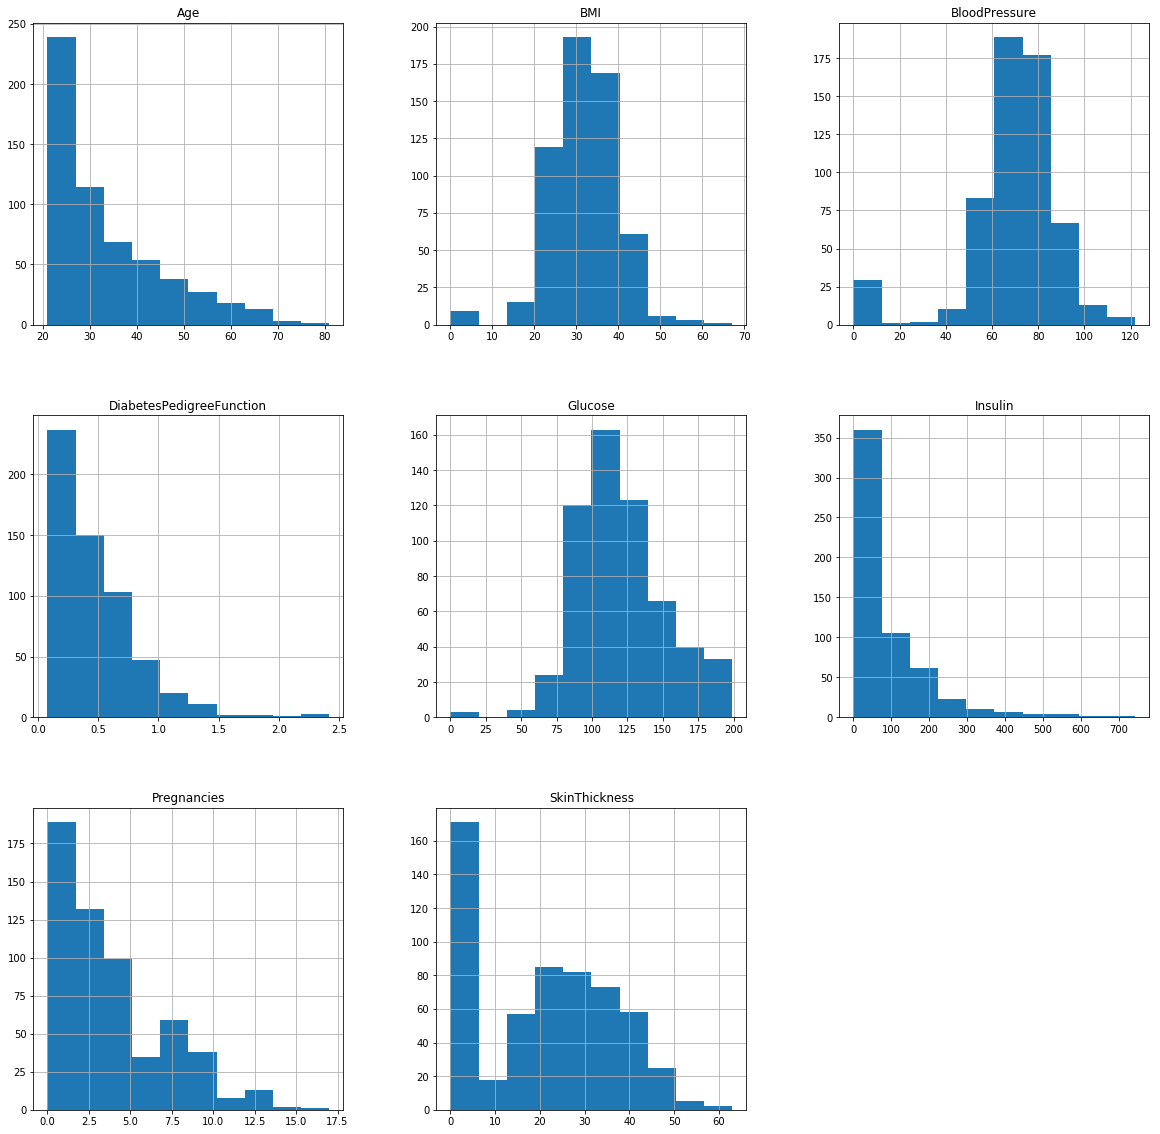

In [10]:
p = X_train.hist(figsize = (20,20))

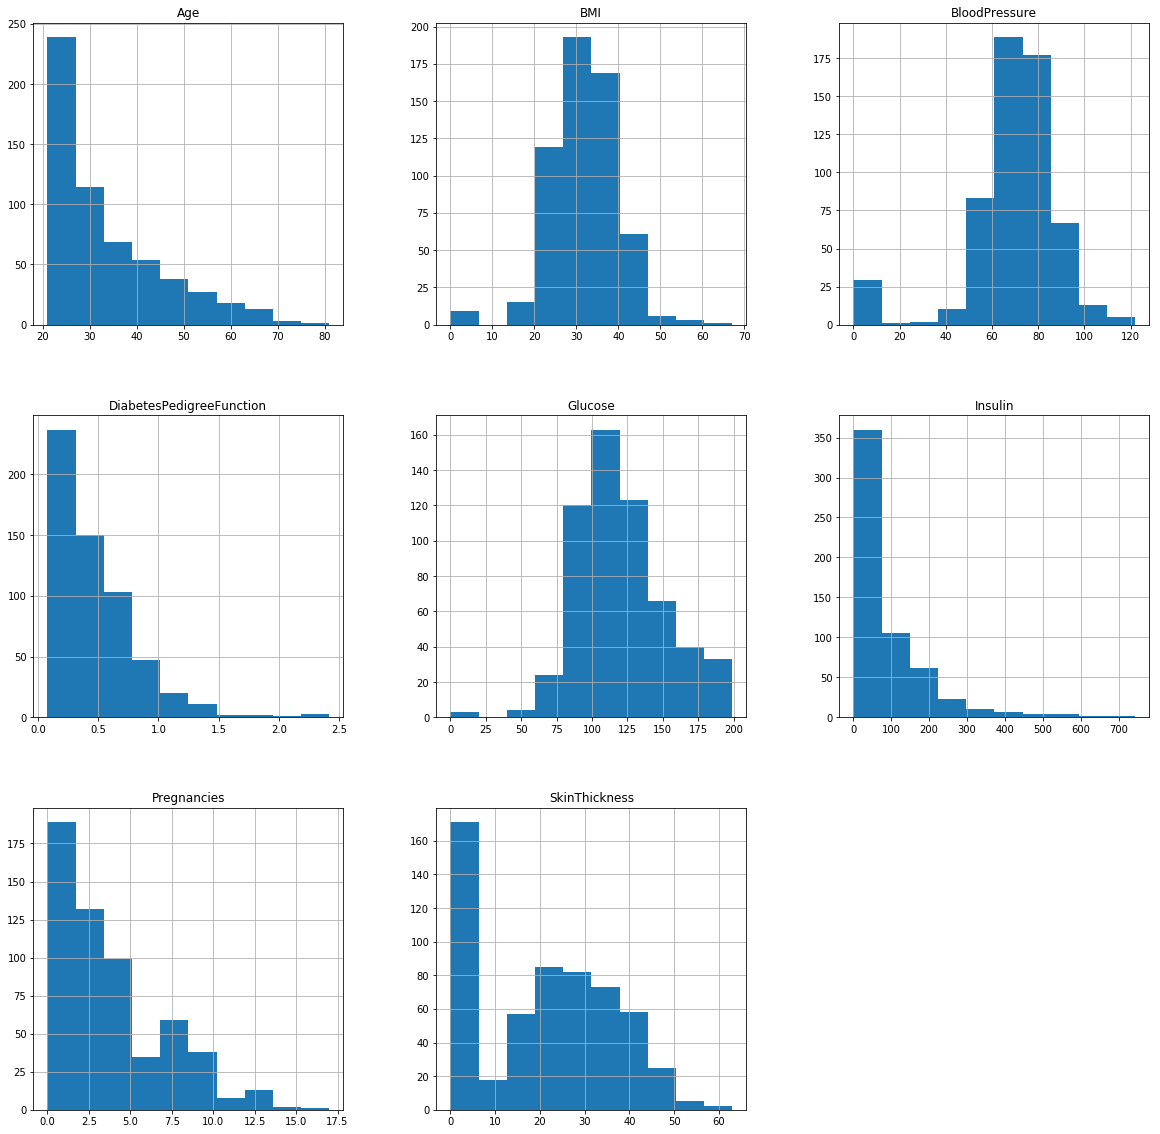

In [11]:
p = X_train.hist(figsize = (20,20))

## Conersion of zeros to NaN

In [12]:
X_train[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' ,'BMI' ]]=X_train[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' ,'BMI' ]].replace(0 , np.NaN)

In [13]:
X_test[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' ,'BMI' ]]=X_test[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' ,'BMI' ]].replace(0 , np.NaN)

In [14]:
print(X_train.isnull().sum())    # give the no. of NaN values  in X-train

Pregnancies                   0
Glucose                       3
BloodPressure                29
SkinThickness               171
Insulin                     278
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [15]:
print(X_test.isna().sum())      # give the no. of NaN values  in X-test

Pregnancies                  0
Glucose                      2
BloodPressure                6
SkinThickness               56
Insulin                     96
BMI                          2
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


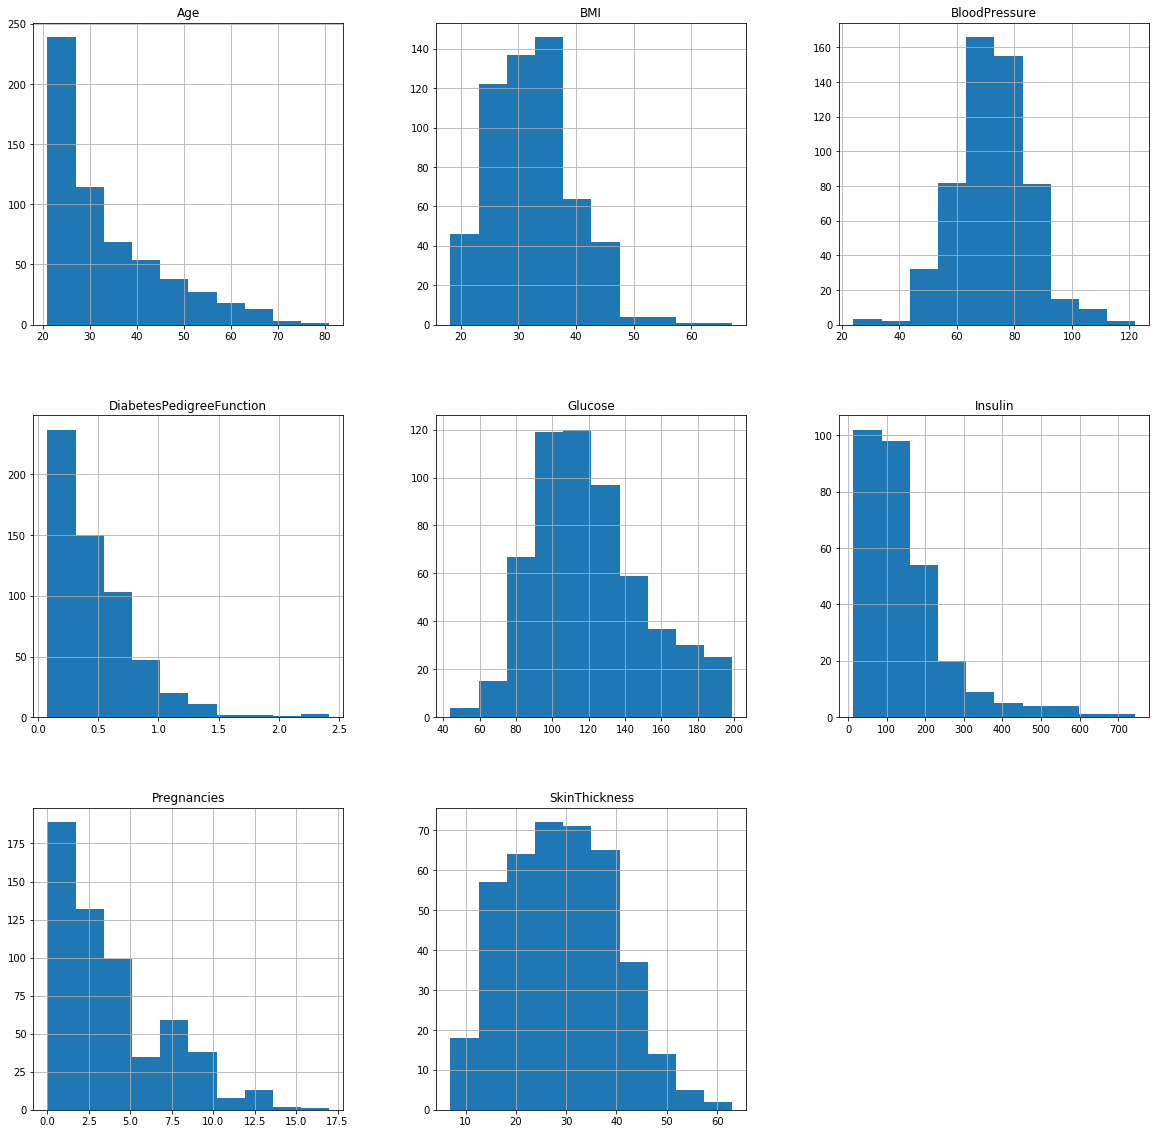

In [16]:
p = X_train.hist(figsize = (20,20))

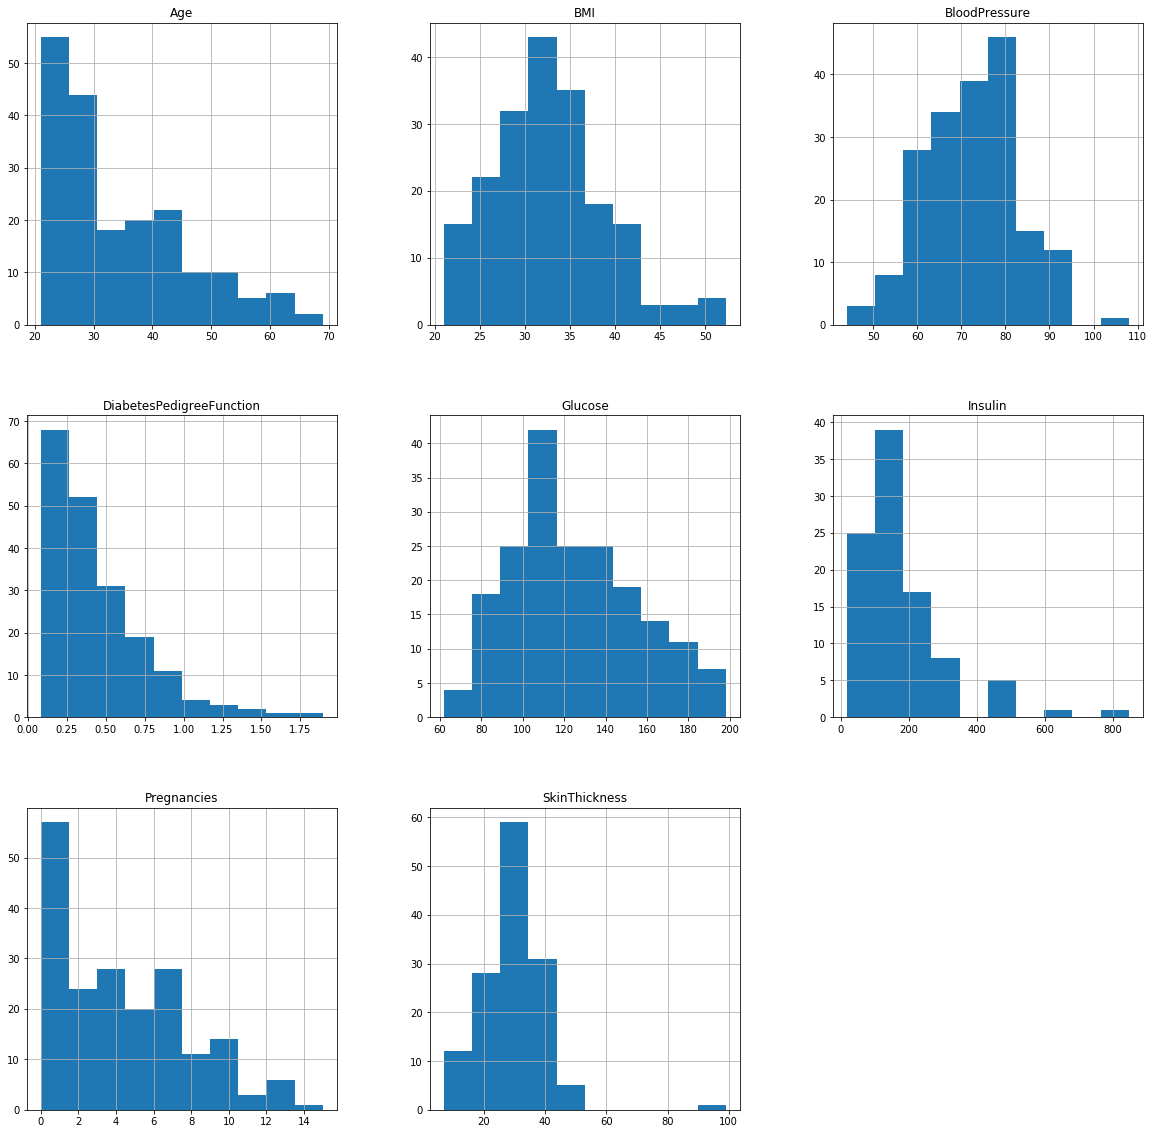

In [17]:
p = X_test.hist(figsize = (20,20))

## Filing the NaN values

In [18]:
X_train['Glucose'].fillna(121 , inplace =True)
X_train['Insulin'].fillna(80 , inplace =True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median() , inplace = True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].median() , inplace =True)
X_train['BMI'].fillna(31 , inplace =True)

In [19]:
X_test['Glucose'].fillna(120 , inplace =True)
X_test['Insulin'].fillna(80 , inplace =True)
X_test['SkinThickness'].fillna(X_train['SkinThickness'].median() , inplace = True)
X_test['BloodPressure'].fillna(X_train['BloodPressure'].median() , inplace =True)
X_test['BMI'].fillna(31, inplace =True)

## Visualization of Dataset

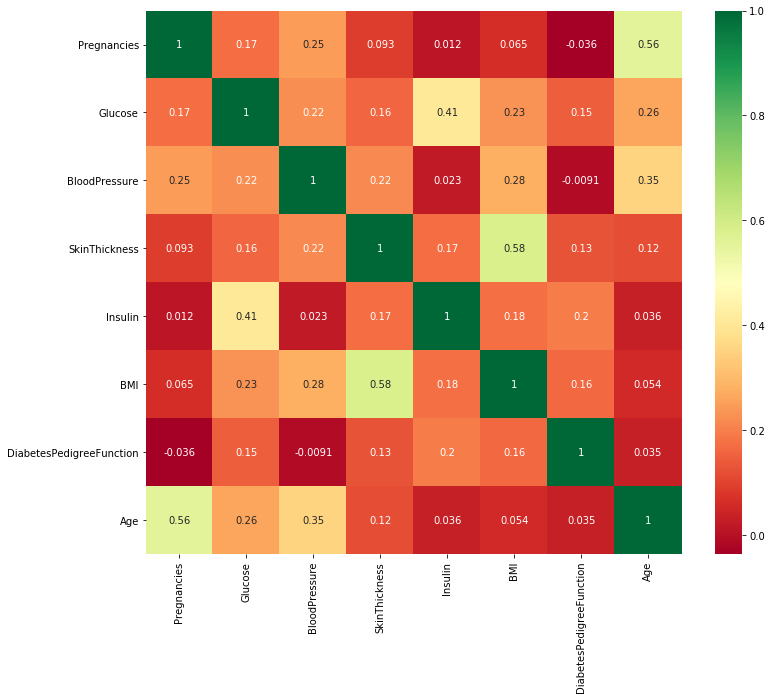

In [20]:
plt.figure(figsize=(12,10))  
sns.heatmap(X_train.corr(), annot=True,cmap ='RdYlGn') 
plt.show()

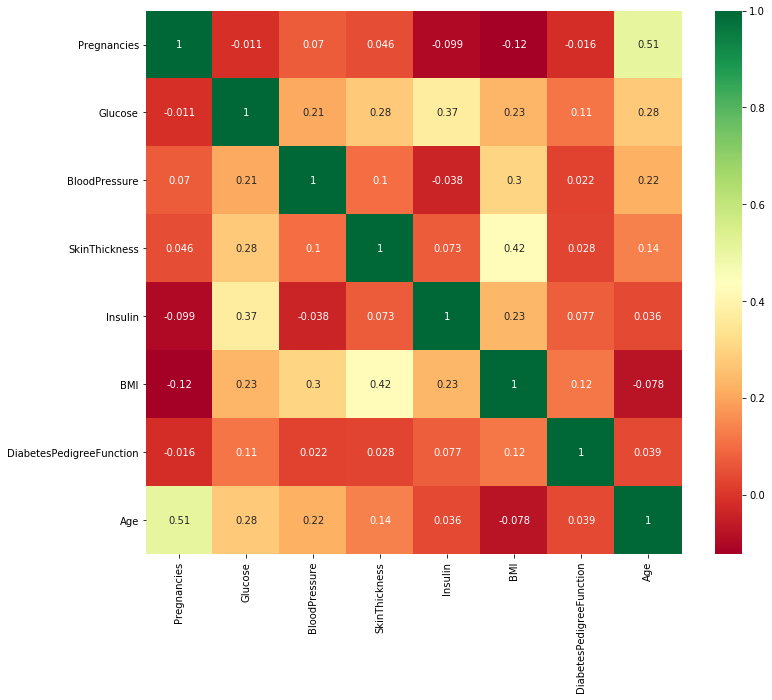

In [21]:
plt.figure(figsize=(12,10))  
sns.heatmap(X_test.corr(), annot=True,cmap ='RdYlGn') 
plt.show()

## Normalizing The Dataset

In [22]:
X_test['Pregnancies']  = (X_test['Pregnancies'] - X_train['Pregnancies'].mean()) / X_train['Pregnancies'].std()
X_test['DiabetesPedigreeFunction']  = (X_test['DiabetesPedigreeFunction'] - X_train['DiabetesPedigreeFunction'].mean()) / X_train['DiabetesPedigreeFunction'].std()
X_test['Glucose']  = (X_test['Glucose'] - X_train['Glucose'].mean()) / X_train['Glucose'].std()
X_test['Insulin'] = (X_test['Insulin'] - X_train['Insulin'].mean()) / X_train['Insulin'].std()
X_test['BloodPressure']  = (X_test['BloodPressure'] - X_train['BloodPressure'].mean()) / X_train['BloodPressure'].std()
X_test['SkinThickness']  = (X_test['SkinThickness'] - X_train['SkinThickness'].mean()) / X_train['SkinThickness'].std()
X_test['BMI']  = (X_test['BMI'] - X_train['BMI'].mean()) / X_train['BMI'].std()
X_test['Age']  = (X_test['Age'] - X_train['Age'].mean()) / X_train['Age'].std()

In [23]:
X_train['Pregnancies']  = (X_train['Pregnancies'] - X_train['Pregnancies'].mean()) / X_train['Pregnancies'].std()
X_train['DiabetesPedigreeFunction']  = (X_train['DiabetesPedigreeFunction'] - X_train['DiabetesPedigreeFunction'].mean()) / X_train['DiabetesPedigreeFunction'].std()
X_train['Glucose']  = (X_train['Glucose'] - X_train['Glucose'].mean()) / X_train['Glucose'].std()
X_train['Insulin'] = (X_train['Insulin'] - X_train['Insulin'].mean()) / X_train['Insulin'].std()
X_train['BloodPressure']  = (X_train['BloodPressure'] - X_train['BloodPressure'].mean()) / X_train['BloodPressure'].std()
X_train['SkinThickness']  = (X_train['SkinThickness'] - X_train['SkinThickness'].mean()) / X_train['SkinThickness'].std()
X_train['BMI']  = (X_train['BMI'] - X_train['BMI'].mean()) / X_train['BMI'].std()
X_train['Age']  = (X_train['Age'] - X_train['Age'].mean()) / X_train['Age'].std()

### Conversion of dataset from pandas dataframe to numpy array

In [24]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values

## KNN Implementation

In [25]:
def euclidean(a1 ,a2):
    return np.sqrt(np.sum((a1-a2)**2))    


In [26]:
def manhattan(a1 , a2):
    return np.sum(abs(a1-a2))

In [27]:
def KNN(X_train , Y_train ,test_point , k=21):
    distances = []
    
    # calculating the distances
    for point , label in zip(X_train , Y_train):
        distance = euclidean(test_point , point)
        distances.append((distance ,label))
        
    # Sorting on the basis of distances 
    distances = sorted(distances ,key = lambda x:x[0])
    
    # selecting the nearest neighbours
    K_Nearest_Neigbors = np.array(distances[:k])
    freq = np.unique(K_Nearest_Neigbors[:,1] , return_counts=True)
    labels,count = freq
    
    # majority voting
    verdict = labels[count.argmax()]
    return verdict

In [28]:
def get_predictions(X_train , Y_train , X_test , k=21):
    predictions=[]
    for test_point in X_test:
        pred=KNN(X_train , Y_train ,test_point ,k)
        predictions.append(pred)
    
    return predictions

In [29]:
prediction = get_predictions(X_train , Y_train , X_test)
prediction

[array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], 

In [30]:
df = pd.DataFrame(prediction)       # conversion of prediction(numpy array) to pandas dataframe
df

,0
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [31]:
df.columns=['Outcome']                 

In [32]:
df.to_csv('sol.csv' , index=False)   # saving the predicted values to a csv file